# Project: Wrangle and Analyze Data

## Table of Contents
<ul>
<li><a href="#intro">1.Introduction</a></li>
<li><a href="#wrangling">2.Data Wrangling</a></li>
<li><a href="#eda">3.Storing, Analyzing, and Visualizing Data for this Project</a></li>
<li><a href="#conclusions">4.Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1.Introduction

Tasks in this project are as follows:

Data wrangling, which consists of:

-Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below).

-Assessing data.

-Cleaning data.


Storing, analyzing, and visualizing your wrangled data.

Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations.

<a id='wrangling'></a>
## 1. Wrangling


## 1.1 Gathering data
In this section I will gather 3 types of data:

The WeRateDogs Twitter archive. 

The tweet image predictions.

Tweet's retweet count and favorite ("like") and other.

In [1]:
# import statements

import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# In this part I will upload CSV file into the panda dataframe
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# preview of the archive dataframe
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# In this part I will get The tweet image predictions

link = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# getting content with requests get 
response = requests.get(link)

# saving file
with open(link.split('/')[-1], mode='wb') as file:
    file.write(response.content)

# creating dataframe
images = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
# preview of dataframe
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
# This part of code was copied from udacity supporting file
# This part gets twitter data
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [6]:
# I have not run twitter API, file was uploaded to respo
#  I will read json file
# for below code I had to use advice from: https://knowledge.udacity.com/questions/195541

lista = []
with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        
        try:
          t_url = json_data['entities']['media'][0]['expanded_url']
        except Exception as e:
          t_url = ""
        lista.append({'tweet_id': json_data['id'],
                           'favorites': json_data['favorite_count'],
                           'retweets': json_data['retweet_count'],
                           'timestamp': json_data['created_at'],
                           'expanded_url': t_url
          })

In [7]:
# finally I will create dataframe
twit_api = pd.DataFrame(lista, columns = ['tweet_id', 
                                            'retweets', 
                                            'favorites', 
                                            'timestamp'])
twit_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id     2354 non-null int64
retweets     2354 non-null int64
favorites    2354 non-null int64
timestamp    2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [8]:
twit_api.head()

,tweet_id,retweets,favorites,timestamp
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017


## 1.2 Assessing Data for this Project
After gathering each of the above pieces of data, 
assess them visually and programmatically for quality and tidiness issues.


Detect and document at least eight (8) quality issues 
and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. 

To meet specifications,the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

In [9]:
# I will run multiple operation to review data in order to determine quality and tidiness issues
# archive dataset info
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
# archive values count for rating denominator
archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [11]:
# archive dataset doggo column values
archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [12]:
b = archive.query('pupper == "pupper" and (doggo != "None" or floofer != "None" or puppo != "None" )')


b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 460 to 1113
Data columns (total 17 columns):
tweet_id                      12 non-null int64
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     12 non-null object
source                        12 non-null object
text                          12 non-null object
retweeted_status_id           2 non-null float64
retweeted_status_user_id      2 non-null float64
retweeted_status_timestamp    2 non-null object
expanded_urls                 12 non-null object
rating_numerator              12 non-null int64
rating_denominator            12 non-null int64
name                          12 non-null object
doggo                         12 non-null object
floofer                       12 non-null object
pupper                        12 non-null object
puppo                         12 non-null object
dtypes: float64(4), int64(3), object(10)
memory usage: 1.7+ KB


In [13]:
# twit_api dataset preview rows
twit_api.head(5)

,tweet_id,retweets,favorites,timestamp
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017


In [14]:
# images dataset preview rows
images.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [15]:
#  twit_api dataset describe
twit_api.describe()

,tweet_id,retweets,favorites
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [16]:
#  images dataset values count for p1 column
images['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
Cardigan                      19
web_site                      19
Shetland_sheepdog             18
Eskimo_dog                    18
beagle                        18
Maltese_dog                   18
teddy                         18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

In [50]:
#  images dataset info
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
#  images dataset values count for p3 dog column
images['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

#  Quality issues

Based on above operations I found following issues:
1. archive data frame, twit_api, images - tweet_id is an integer however it is identifier not measure value.

2. archive data frame - there is a different denominator value thus no standard way to see ranking

3. archive data frame - rating_denominator gets 0 for 1 record

4. archive data frame- Rating value gets extreme values

5. archive data frame - timestamp is a text

6. archive data frame has retweets and replies (retweeted_status_id)

7. archive data frame - name of the dog is None for 745 records

8. archive data frame - name of the dog is 'a', 'the', 'an' 

9. archive data frame - dogs gets multiple values for doggo,floofer,pupper, puppo	


Tidiness issues:  

1. images - p1/p2/p3 multiple values for prediction

2. doggo, floofer, pupper, puppo can be presented like one column  

3. Data is stored in 3 different data frames 





# 1.3 Cleaning data
In this section I will clean quality and tidiness issues.

In [18]:
# In the first step I will create copy of data
images_clean = images.copy()
twit_api_clean = twit_api.copy()
archive_clean = archive.copy()


In [19]:
# 1. Quality issue: archive dataframe, twit_api, images - tweet_id is an integer however it is identifier not mesure value.
# In 3 datasets I will change tweet_id  to string 
images_clean['tweet_id'] = images_clean['tweet_id'].astype('str')
twit_api_clean['tweet_id'] = twit_api_clean['tweet_id'].astype('str')
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype('str')

In [20]:
# I will check if this was done sucessful by runing info 
images_clean.info()
twit_api_clean.info()
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id     2354 non-null object
retweets     2354 non-null int64
favorites    2354 non-null int64
timestamp    2354 non-null object
dtypes: int64(2), object(2)
memory usage: 73.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      

In [21]:
# 2. archive dataframe - there is a different denoinator value thus no standard way to see ranking
# I will deal with these issues and create one column ranking
archive_clean['rating'] =archive_clean.rating_numerator / archive_clean.rating_denominator
archive_clean['rating'] = archive_clean['rating'].astype('float64')

In [22]:
# I will check if this was done sucessful by running value counts
archive_clean['rating'].value_counts()

1.200000      562
1.100000      469
1.000000      463
1.300000      351
0.900000      157
0.800000      102
0.700000       54
1.400000       54
0.500000       38
0.600000       32
0.300000       19
0.400000       15
0.200000       11
0.100000        8
42.000000       2
1.500000        2
0.000000        2
7.500000        2
0.818182        2
1.250000        1
66.600000       1
inf             1
1.700000        1
3.428571        1
0.636364        1
2.700000        1
0.733333        1
2.600000        1
18.200000       1
177.600000      1
Name: rating, dtype: int64

In [23]:
# 3. archive dataframe- rating_denominator gets 0 for 1 record
# As this value is used for rating I will put rating to 0 and delete columns
archive_clean.loc[archive_clean['rating_denominator'] == 0, 'rating'] = 0
archive_clean.drop([ 'rating_numerator', 'rating_denominator'], axis=1, inplace=True)

In [24]:
# I will check if this was done properly
archive_clean['rating'].value_counts()

1.200000      562
1.100000      469
1.000000      463
1.300000      351
0.900000      157
0.800000      102
0.700000       54
1.400000       54
0.500000       38
0.600000       32
0.300000       19
0.400000       15
0.200000       11
0.100000        8
0.000000        3
42.000000       2
0.818182        2
1.500000        2
7.500000        2
1.250000        1
66.600000       1
2.600000        1
177.600000      1
0.636364        1
18.200000       1
0.733333        1
1.700000        1
3.428571        1
2.700000        1
Name: rating, dtype: int64

In [25]:
# 4. archive dataframe - Rating value gets extreme values (like 177.6,  42, 66, 7.5)
# I will remove these extreme values that are above 2
archive_clean = archive_clean.query('rating < 2')

In [26]:
# I check if this was executed properly
archive_clean['rating'].value_counts()

1.200000    562
1.100000    469
1.000000    463
1.300000    351
0.900000    157
0.800000    102
1.400000     54
0.700000     54
0.500000     38
0.600000     32
0.300000     19
0.400000     15
0.200000     11
0.100000      8
0.000000      3
0.818182      2
1.500000      2
1.700000      1
0.733333      1
0.636364      1
1.250000      1
Name: rating, dtype: int64

In [27]:
# 5. archive dataframe - timestamp is a text
# I will change it to datetime

archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [28]:
# I will check if this was done properly
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2346 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2346 non-null object
in_reply_to_status_id         75 non-null float64
in_reply_to_user_id           75 non-null float64
timestamp                     2346 non-null datetime64[ns]
source                        2346 non-null object
text                          2346 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2290 non-null object
name                          2346 non-null object
doggo                         2346 non-null object
floofer                       2346 non-null object
pupper                        2346 non-null object
puppo                         2346 non-null object
rating                        2346 non-null float64
dtypes: datetime64[ns](1), float64(5), object(10)
memory usage: 311.6+ 

In [29]:
# 6. archive dataframe has retweets (retweeted_status_id, in_reply_to_status_id)
archive_clean = archive_clean.drop(archive_clean[(archive_clean['in_reply_to_status_id'].isnull() == False) | (archive_clean['retweeted_status_id'].isnull() == False)].index)



In [30]:
# I will check if these was executed
archive_clean.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating
count,0.0,0.0,0.0,0.0,2091.000000
mean,NaN,NaN,NaN,NaN,1.059854
std,NaN,NaN,NaN,NaN,0.216125
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,1.100000
75%,NaN,NaN,NaN,NaN,1.200000
max,NaN,NaN,NaN,NaN,1.400000


In [31]:
# I will drop not needed columns
archive_clean = archive_clean.drop(['in_reply_to_status_id', 'retweeted_status_id'], axis=1)

In [32]:
# 7 archive dataframe - name of the dog is None for 745 records
# I will replace 'None' with NaN in name column
archive_clean['name'] = archive_clean['name'].replace('None', np.nan)

In [33]:
#8. archive dataframe - name of the dog is 'a', 'the', 'an' 
# I will replace 'a', 'the', 'an'  with NaN in name column
archive_clean['name'] = archive_clean['name'].replace(['a', 'an', 'the'], np.nan)


In [34]:
# I will check with cleaning steps 7 and 8 were executed properly
archive_clean['name'].value_counts()

Charlie      11
Lucy         11
Oliver       10
Cooper       10
Penny         9
Tucker        9
Sadie         8
Winston       8
Lola          8
Toby          7
Daisy         7
Oscar         6
Bo            6
Stanley       6
Jax           6
Bella         6
Koda          6
Bailey        6
Scout         5
Bentley       5
Dave          5
Milo          5
Buddy         5
Chester       5
Leo           5
Rusty         5
Louis         5
Gary          4
Finn          4
Jeffrey       4
             ..
Chubbs        1
Genevieve     1
Skittle       1
Julius        1
Kingsley      1
Huck          1
Fido          1
Ferg          1
Emmy          1
Rupert        1
Zuzu          1
Pubert        1
Millie        1
Henry         1
Dunkin        1
Biden         1
Juckson       1
Remus         1
Mattie        1
such          1
Jameson       1
Chloe         1
Clyde         1
Nimbus        1
Liam          1
Napolean      1
Florence      1
Gilbert       1
Tedders       1
Tommy         1
Name: name, Length: 950,

In [35]:
# 9. archive dataframe - dogs gets mulitple values for doggo,floofer,pupper, puppo	
# In order to solve that I will consider only 1 value giving following order pupper, doggo, floofer and puppo

archive_clean.loc[archive_clean['pupper'] == 'pupper', 'doggo'] = 'None'
archive_clean.loc[archive_clean['doggo'] == 'doggo', 'floofer'] = 'None'
archive_clean.loc[archive_clean['doggo'] == 'doggo', 'puppo'] = 'None'

In [36]:
# I will check if operation was completed
a = archive_clean.groupby('pupper')['doggo'].value_counts()
a
b = archive_clean.groupby('pupper')['floofer'].value_counts()
b

pupper  floofer
None    None       1853
        floofer       9
pupper  None        229
Name: floofer, dtype: int64

All quality issues were solved. I will solve now tidiness issues.

In [37]:
# Tidiness - images - p1/p2/p3 multiple values for prediction
# As a solution I would create one column that will store the highest prediction for dog
# Logic would be if p1_dog is True then p1 else if p2_dog is true then p2 else if p3_dog is True then p3 else NaN.
# I will create new column using P values and if statement

breed = []
confidence = []

def breed_con(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('UNKNOWN')
        confidence.append(0)
      


images_clean.apply(breed_con, axis=1)
images_clean['breed'] = breed
images_clean['confidence'] = confidence
# Checking if operation was executed
images_clean.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


In [38]:
# dropping not needed columns
images_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',], axis=1, inplace=True)
images_clean.head()

,tweet_id,jpg_url,img_num,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


In [39]:
# Tidiness - doggo, floofer, pupper, puppo can be presented like one column
# In order to solve that I will consider only 1 value giving following order pupper, doggo, floofer and puppo

dog_style = []

def style_dog(row):
    if row['pupper'] == 'pupper':
        dog_style.append(row['pupper'])
    elif row['doggo'] == 'doggo':
        dog_style.append(row['doggo'])
    elif row['floofer'] == 'floofer':
        dog_style.append(row['floofer'])
    elif row['puppo'] == 'puppo':
        dog_style.append(row['puppo'])
    else:
        dog_style.append('NOT_DEFINED')


archive_clean.apply(style_dog, axis=1)
archive_clean['dog_style'] = dog_style

# checking dats
archive_clean.tail()

,tweet_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,rating,dog_style
2351,666049248165822465,NaN,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,NaN,None,None,None,None,0.5,NOT_DEFINED
2352,666044226329800704,NaN,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,NaN,None,None,None,None,0.6,NOT_DEFINED
2353,666033412701032449,NaN,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,NaN,None,None,None,None,0.9,NOT_DEFINED
2354,666029285002620928,NaN,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,NaN,None,None,None,None,0.7,NOT_DEFINED
2355,666020888022790149,NaN,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,NaN,None,None,None,None,0.8,NOT_DEFINED


In [41]:
# finally removing not needed anymore columns
archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)
archive_clean.head()

KeyError: "['doggo' 'floofer' 'pupper' 'puppo'] not found in axis"

In [42]:
# Tidiness - 3. Data is stored in 3 different dataframes 
# We can have 2 datasets: twitter_archive_master and image_predictions to make data more tidy.
# I will merge both archive_clean and twit_api_clean

twitter_archive_master = archive_clean.merge(twit_api_clean,how='left', left_on='tweet_id', right_on='tweet_id')

# archive_clean join with twit_api_clean, images_clean
twitter_archive_master.head()


,tweet_id,in_reply_to_user_id,timestamp_x,source,text,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,rating,dog_style,retweets,favorites,timestamp_y
0,892420643555336193,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,NOT_DEFINED,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,NOT_DEFINED,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NOT_DEFINED,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,NOT_DEFINED,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,NOT_DEFINED,9774,41048,Sat Jul 29 16:00:24 +0000 2017


In [43]:
# I will drop not needed columns in twitter_archive_master
twitter_archive_master.drop(['in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'timestamp_y'], axis=1, inplace=True)
twitter_archive_master.head()

,tweet_id,timestamp_x,source,text,expanded_urls,name,rating,dog_style,retweets,favorites
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,NOT_DEFINED,8853,39467
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,NOT_DEFINED,6514,33819
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NOT_DEFINED,4328,25461
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,NOT_DEFINED,8964,42908
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,NOT_DEFINED,9774,41048


Data wrangling process was completed here.

<a id='eda'></a>
## 3. Storing, Analyzing, and Visualizing Data for this Project

In this step I will store the clean DataFrames in a CSV files with the main one named twitter_archive_master.csv. I will also analyze and visualize my wrangled data in this Jupyter Notebook. At least three (3) insights and one (1) visualization will be produced.

In [44]:
# I will save 2 files to csv
images_clean.to_csv("images_breed_predictions.csv", sep = ",")
twitter_archive_master.to_csv("twitter_archive_master.csv", sep = ",")

Data analysis will focus to answer following questions:

Question [1]: 
What kind of breed is the most popular in the image breed prediction dataset taking for consideration only predictions with confidence greater than 70%?

Question [2]: 
What is the breed that gets on average the highest retweets count taking for consideration only predictions with confidence greater than 70%?

Question [3]:
Does number of retweets for dogs pictures increase over time?


In [45]:
# Question 1
# In order to answer Q1 we need to narrow data set to data with confidence >0.7
q1 = images_clean.query('confidence > 0.7')

# We will show the top breeds
q1['breed'].value_counts()[:10]

golden_retriever      92
Labrador_retriever    52
Pembroke              52
pug                   37
Chihuahua             34
Samoyed               25
Pomeranian            23
French_bulldog        19
chow                  19
toy_poodle            15
Name: breed, dtype: int64

Text(0,0.5,'Breed')

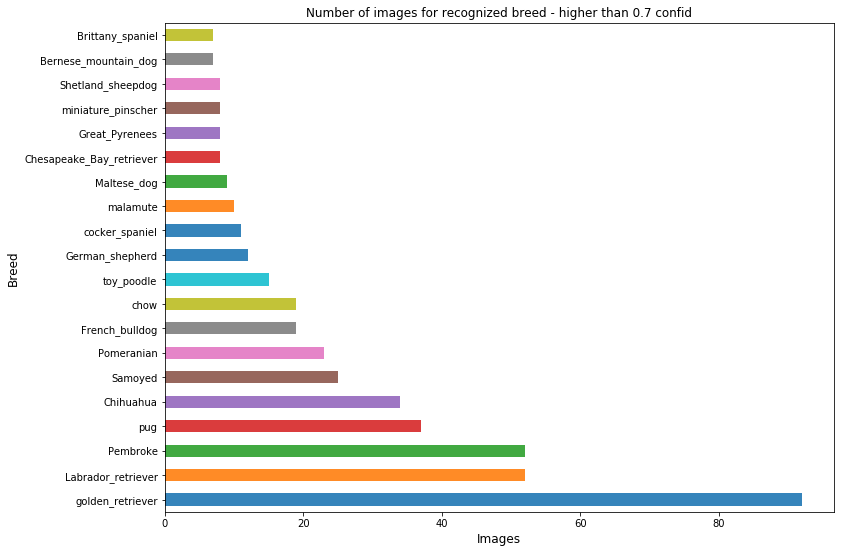

In [46]:
# This dataset will be also visualized
q1['breed'].value_counts()[:20].plot(kind='barh',alpha = 0.9, figsize=(12, 9), title = 'Number of images for recognized breed - higher than 0.7 confid')
plt.xlabel('Images', fontsize=12)
plt.ylabel('Breed', fontsize=12)

As we can see on the visualization above golden retirever(golden_retriever) is the most popular breed followed by pembroke.

In [47]:
# Question 2
# In order to answer Q2 we need to merge 2 datasets to get all columns in one dataframe
q2_prep = twitter_archive_master.merge(images_clean,how='left', left_on='tweet_id', right_on='tweet_id').merge(twit_api_clean,how='left', left_on='tweet_id', right_on='tweet_id')
q2_a = q2_prep.query('confidence > 0.7')

# Now, I will groupby and calculate mean
q2_b =q2_a.groupby('breed')['favorites_x'].mean()

# In order to prepare data for visualization I will sort values
q2_b.sort_values(ascending = False,inplace=True)

# Finally, we can look on our data
q2_b.head()

breed
black-and-tan_coonhound      33911.000000
Leonberg                     29684.000000
Staffordshire_bullterrier    21045.000000
French_bulldog               19679.210526
Cardigan                     19609.500000
Name: favorites_x, dtype: float64

Text(0.5,0,'Breed')

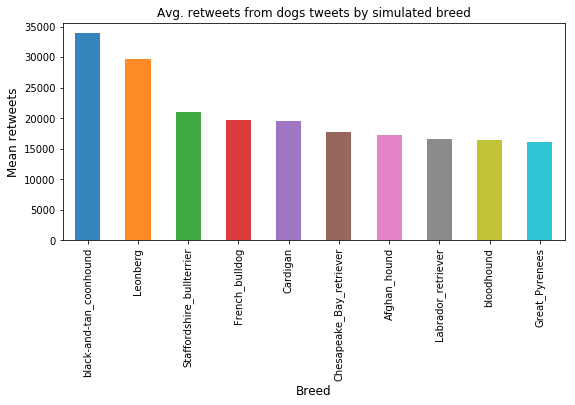

In [48]:
# This dataset will be also visualized

q2_b.nlargest(n=10).plot(kind='bar',alpha = 0.9, figsize=(9, 4), title = 'Avg. retweets from dogs tweets by simulated breed')
plt.ylabel('Mean retweets', fontsize=12)
plt.xlabel('Breed', fontsize=12)

As we can see above Black and Tan Coonhound (black-and-tan_coonhound) on average gets the higgest number of retweers followed by Leonberg.

In [49]:
# Question 3
# In order to answer question 3 I will put timestamp to different format. It will help later with visualization.
q3 = twitter_archive_master
q3['month'] = q3['timestamp_x'].dt.to_period('M')

Text(0.5,0,'Breed')

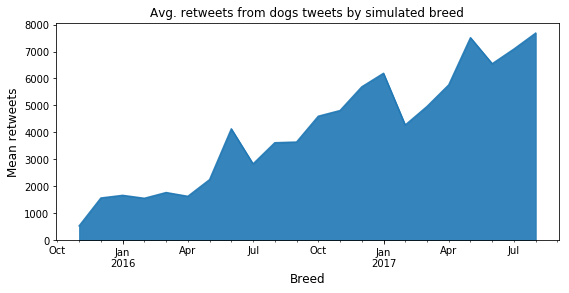

In [50]:
# Finally, I will visualize dataset

q3.groupby('month')['retweets'].mean().plot(kind='area',alpha = 0.9, figsize=(9, 4), title = 'Avg. retweets from dogs tweets by simulated breed')
plt.ylabel('Mean retweets', fontsize=12)
plt.xlabel('Breed', fontsize=12)


As we can see above even without need to use moving average we see increasing trend for retweets number.

<a id='conclusions'></a>
## 3.Conclusion

In this exercise I tried to answer 3 questions:

Question [1]: What kind of breed is the most popular in the image breed prediction dataset taking for consideration only predictions with confidence greater than 70%?

Question [2]: What is the breed that gets on average the highest retweets count taking for consideration only predictions with confidence greater than 70%?

Question [3]: Does number of retweets for dogs pictures increase over time?

In regards to question 1: as it was seen above golden retriever (golden_retriever) is the most popular breed followed by pembroke.
In regards to question 2: as it was seen above Black and Tan Coonhound (black-and-tan_coonhound) on average gets the highest number of retweets followed by Leonberg.
In regards to question 3: There is an increasing trend for the retweets of pictures of dogs.
Limitations: As a last point it is important to mention that this may not represent 100% correct conclusion. Data used for this analysis is a subset of data provided for the purpose of this exercise. Although, multiple operations were done in the wrangling section it still may not be sufficient to confirm data is representative to make important conclusions.

